
### Universidad del Valle de Guatemala <br>
### Security Data Science <br>
### Luis Pedro Cuéllar - 18220


# Proyecto 3 --> Ataques a modelos de Deep Learning 

In [3]:
import pandas as pd
import numpy as np 
import glob

import itertools

from keras import applications 
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img 
from keras.preprocessing import image
from keras.utils.np_utils import to_categorical 

import matplotlib.pyplot as plt 

from sklearn import metrics
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [7]:
##  Instalación de la herramienta Adversarial Robustness ToolBox necesaria para el desarrollo del proyecto
!pip install adversarial-robustness-toolbox

You should consider upgrading via the '/Users/lpcuellar/Documents/UVG/2022-1/SDS/env/bin/python -m pip install --upgrade pip' command.


### MODELO ORIGINAL

#### Cargamos el dataset de imágenes

In [1]:
DATA_DIR = 'malimg_paper_dataset_imgs'

In [4]:
img_classes = []

for name in glob.glob(DATA_DIR + '/*'):
    img_class = name.split('/')[1]
    
    if '.txt' not in img_class:
        img_classes.append(img_class)
        print(img_class)
        
print("\nHay un total de {} clases\n".format(len(img_classes)))

Swizzor.gen!I
Instantaccess
Dialplatform.B
Autorun.K
Dontovo.A
C2LOP.gen!g
C2LOP.P
Lolyda.AA1
Lolyda.AT
Adialer.C
Fakerean
Rbot!gen
Allaple.A
VB.AT
Yuner.A
Malex.gen!J
Swizzor.gen!E
Agent.FYI
Skintrim.N
Obfuscator.AD
Lolyda.AA2
Lolyda.AA3
Wintrim.BX
Allaple.L
Alueron.gen!J

Hay un total de 25 clases



In [5]:
datagen = ImageDataGenerator().flow_from_directory(directory = DATA_DIR, target_size = (128, 128), batch_size=10000) 

Found 9339 images belonging to 25 classes.


In [7]:
datagen.class_indices

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

In [8]:
images, label = next(datagen)

In [9]:
images.shape

(9339, 128, 128, 3)

In [10]:
label.shape

(9339, 25)

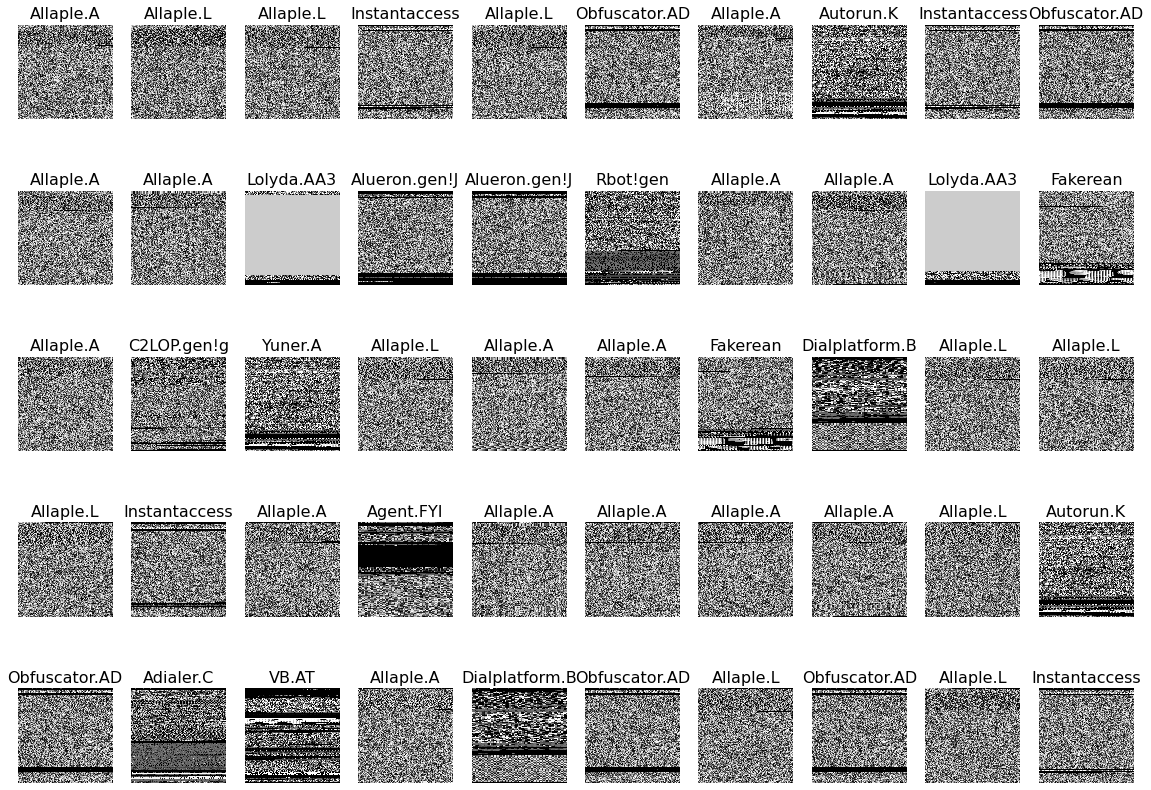

In [11]:
## Mostramos las imágenes que tiene el dataset

if type(images[0]) is np.ndarray:
    images = np.array(images).astype(np.uint8)
    
    if (images.shape[-1] != 3):
        images = images.transpose((0,2,3,1))

f = plt.figure(figsize=(20, 30))

cols = 10 

for i in range(0,50):
    sp = f.add_subplot(10, cols, i+1)
    sp.axis('Off')

    if label is not None:
        sp.set_title(list(datagen.class_indices.keys())[np.argmax(label[i])], fontsize=16)

    plt.imshow(images[i], interpolation=None if False else 'none')

#### Dividimos el dataset en dataset de entrenamiento y testeo

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images / 255., label, test_size = 0.3, random_state = 1401)

print("X_train --> ", X_train.shape)
print("y_train --> ", y_train.shape)
print("X_test --> ", X_test.shape)
print("y_test--> ", y_test.shape)

X_train -->  (6537, 128, 128, 3)
y_train -->  (6537, 25)
X_test -->  (2802, 128, 128, 3)
y_test-->  (2802, 25)


#### Hacemos la creación del modelo

In [40]:
import keras
from tensorflow.keras import datasets, layers, models
from keras.layers import Dense, Dropout, Flatten

model = models.Sequential()

model.add(layers.Conv2D(30, kernel_size=(3, 3),activation='relu', input_shape=(128,128,3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(15, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='softmax'))

In [42]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

#### Corremos el modelo

In [81]:
## Tuve que hacer cambios al modelo orginal ya que me dio problemas al generar el ataque

og_result = model.fit(X_train, y_train, epochs = 5)

Train on 6537 samples
Epoch 1/5
6537/6537 [==============================] - 46s 7ms/sample - loss: 0.0419 - accuracy: 0.9882
Epoch 2/5
6537/6537 [==============================] - 35s 5ms/sample - loss: 0.0407 - accuracy: 0.9884
Epoch 3/5
6537/6537 [==============================] - 34s 5ms/sample - loss: 0.0407 - accuracy: 0.9884
Epoch 4/5
6537/6537 [==============================] - 35s 5ms/sample - loss: 0.0399 - accuracy: 0.9884
Epoch 5/5
6537/6537 [==============================] - 36s 5ms/sample - loss: 0.0394 - accuracy: 0.9884


#### Obtenemos las métricas del modelo

In [97]:
# plt.plot(og_result.history['accuracy'], label='accuracy')
# plt.plot(og_result.history['loss'], label = 'loss')
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.ylim([0.5, 1])
# plt.legend(loc='lower right')

# test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

# print('Accuracy: %0.2f' %(test_acc*100))

In [98]:
print("Original model evaluation:")
print(model.evaluate(X_test, y_test))


Original model evaluation:
[0.06414997814719078, 0.9817987]


In [103]:
original_classifier = KerasClassifier(model, clip_values=(0, 1), use_logits=False)

### ATAQUE DE EXTRACCIÓN

In [58]:
##  Entrenamiento y predicción con el modelo original está puesto arriba

##  Creamos los datasets de entrenamiento y testeo de forma aleatoria
##  quitamos el random_state para obtener datos aleatorios.

X_train_ex, X_test_ex, y_train_ex, y_test_ex = train_test_split(images / 255., label, test_size = 0.3)

print("X_train_ex --> ", X_train.shape)
print("y_train_ex --> ", y_train.shape)
print("X_test_ex --> ", X_test.shape)
print("y_test_ex --> ", y_test.shape)

X_train_ex -->  (6537, 128, 128, 3)
y_train_ex -->  (6537, 25)
X_test_ex -->  (2802, 128, 128, 3)
y_test_ex -->  (2802, 25)


In [49]:
from art.attacks.evasion import FastGradientMethod
from art.estimators.classification import KerasClassifier
import tensorflow as tf

tf.compat.v1.disable_eager_execution()

In [100]:
##  Creamos el modelo sustituto
sub_model = Sequential()

sub_model.add(layers.Conv2D(15, kernel_size = (3, 3), activation='relu', input_shape = (128,128,3)))
sub_model.add(layers.MaxPooling2D(pool_size = (2, 2)))
sub_model.add(Flatten())
sub_model.add(Dense(128, activation="softmax"))
sub_model.add(Dense(64, activation="softmax"))
sub_model.add(Dense(25, activation="softmax"))

sub_model.compile(loss = "categorical_crossentropy", optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), metrics = ["accuracy"]) 


In [102]:
stolen_classifier = KerasClassifier(model = sub_model, use_logits = False, clip_values = (0, 1))

In [131]:
from art.attacks.extraction import CopycatCNN, KnockoffNets

def train_stolen_model(amount, original_classifier, X_train, X_test, y_train, y_test, stolen_classifier):
    results = []

    attack_catalogue = {
        "COPYCAT": CopycatCNN(
            classifier = original_classifier,
            batch_size_fit = 64,
            batch_size_query = 64,
            nb_epochs = 10, 
            nb_stolen = amount,
            use_probability = True
        ),
        "KNOCKOFF": KnockoffNets(
            classifier = original_classifier,
            batch_size_fit = 64,
            batch_size_query = 64,
            nb_epochs = 10, 
            nb_stolen = amount,
            use_probability = True
        )
    }

    for name, attack in attack_catalogue.items():
        classifier_stolen = attack.extract(X_train, y_train, thieved_classifier = stolen_classifier)
        acc = classifier_stolen._model.evaluate(X_test, y_test)[1]
        
        print(name, ":", acc)
        results.append([name, len_steal, acc])

    return results


stolen_amounts = [250, 500, 1000, 2000, 3000, 4000, 5000]

stolen_results = []

for len_steal in stolen_amounts:
    stolen_results.append(train_stolen_model(
        len_steal, 
        original_classifier,
        X_train_ex, 
        X_test_ex, 
        y_train_ex, 
        y_test_ex, 
        stolen_classifier
    ))

Train on 250 samples
Epoch 1/10
250/250 [==============================] - 1s 3ms/sample - loss: 2.4967 - accuracy: 0.2880
Epoch 2/10
250/250 [==============================] - 1s 3ms/sample - loss: 2.4963 - accuracy: 0.2880
Epoch 3/10
250/250 [==============================] - 1s 2ms/sample - loss: 2.4955 - accuracy: 0.2880
Epoch 4/10
250/250 [==============================] - 1s 3ms/sample - loss: 2.4947 - accuracy: 0.2880
Epoch 5/10
250/250 [==============================] - 1s 3ms/sample - loss: 2.4936 - accuracy: 0.2880
Epoch 6/10
250/250 [==============================] - 1s 3ms/sample - loss: 2.4926 - accuracy: 0.2880
Epoch 7/10
250/250 [==============================] - 1s 2ms/sample - loss: 2.4914 - accuracy: 0.2880
Epoch 8/10
250/250 [==============================] - 1s 2ms/sample - loss: 2.4904 - accuracy: 0.2880
Epoch 9/10
250/250 [==============================] - 1s 2ms/sample - loss: 2.4894 - accuracy: 0.2880
Epoch 10/10
250/250 [==============================] - 1s 2ms

In [140]:
cleaned_results = []

for i in stolen_results:
    cleaned_results.append(i[0])
    cleaned_results.append(i[1])

cleaned_results

[['COPYCAT', 250, 0.32512492],
 ['KNOCKOFF', 250, 0.32512492],
 ['COPYCAT', 500, 0.32512492],
 ['KNOCKOFF', 500, 0.32512492],
 ['COPYCAT', 1000, 0.32512492],
 ['KNOCKOFF', 1000, 0.32512492],
 ['COPYCAT', 2000, 0.32512492],
 ['KNOCKOFF', 2000, 0.32512492],
 ['COPYCAT', 3000, 0.32512492],
 ['KNOCKOFF', 3000, 0.32512492],
 ['COPYCAT', 4000, 0.32512492],
 ['KNOCKOFF', 4000, 0.32512492],
 ['COPYCAT', 5000, 0.32512492],
 ['KNOCKOFF', 5000, 0.32512492]]

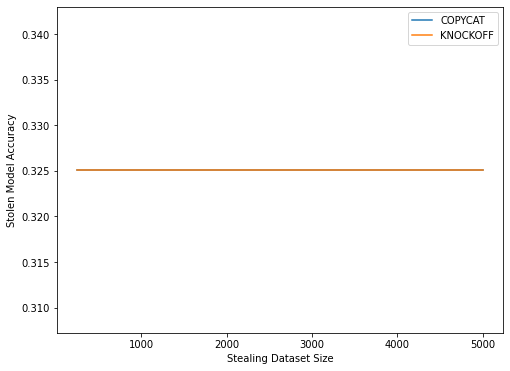

In [143]:
df = pd.DataFrame(cleaned_results, columns=['Method Name', 'Stealing Dataset Size', "Accuracy"])

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel("Stealing Dataset Size")
ax.set_ylabel("Stolen Model Accuracy")

for name, group in df.groupby("Method Name"):
    group.plot(1, 2, ax=ax, label=name)

plt.show()

#### Capa protegida

In [150]:
from art.defences.postprocessor import ReverseSigmoid
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Flatten, InputLayer, Reshape

postprocessor = ReverseSigmoid(beta=1.0, gamma=0.2)
classifier_protected = KerasClassifier(model, clip_values=(0, 1), use_logits=False, postprocessing_defences=postprocessor)

model_flat = Sequential([InputLayer([49152]), Reshape([128, 128, 3]), model])
model_flat.compile('sgd', 'categorical_crossentropy', ['accuracy'])
classifier_flat_protected = KerasClassifier(model_flat, clip_values=(0, 1), use_logits=False, postprocessing_defences=postprocessor)

In [151]:
from art.attacks.extraction import CopycatCNN, KnockoffNets

def train_stolen_model(amount, classifier_protected, X_train, X_test, y_train, y_test, stolen_classifier):
    results = []

    attack_catalogue = {
        "COPYCAT (vs. PROTECTED)": CopycatCNN(
            classifier = classifier_protected,
            batch_size_fit = 64,
            batch_size_query = 64,
            nb_epochs = 10, 
            nb_stolen = amount,
            use_probability = True
        ),
        "KNOCKOFF (vs. PROTECTED)": KnockoffNets(
            classifier = classifier_protected,
            batch_size_fit = 64,
            batch_size_query = 64,
            nb_epochs = 10, 
            nb_stolen = amount,
            use_probability = True
        )
    }

    for name, attack in attack_catalogue.items():
        classifier_stolen = attack.extract(X_train, y_train, thieved_classifier = stolen_classifier)
        acc = classifier_stolen._model.evaluate(X_test, y_test)[1]
        
        print(name, ":", acc)
        results.append([name, len_steal, acc])

    return results


stolen_amounts = [250, 500, 1000, 2000, 3000, 4000, 5000]

stolen_protected_results = []

for len_steal in stolen_amounts:
    stolen_protected_results.append(train_stolen_model(
        len_steal, 
        classifier_protected,
        X_train_ex, 
        X_test_ex, 
        y_train_ex, 
        y_test_ex, 
        stolen_classifier
    ))

cleaned_protected_results = []

for i in stolen_protected_results:
    cleaned_protected_results.append(i[0])
    cleaned_protected_results.append(i[1])

Train on 250 samples
Epoch 1/10


/Users/lpcuellar/Documents/UVG/2022-1/SDS/env/lib/python3.8/site-packages/art/defences/postprocessor/reverse_sigmoid.py:75: RuntimeWarning: divide by zero encountered in log
  perturbation_r = self.beta * (sigmoid(-self.gamma * np.log((1.0 - preds_clipped) / preds_clipped)) - 0.5)


250/250 [==============================] - 1s 3ms/sample - loss: 3.7468 - accuracy: 0.3520
Epoch 2/10
250/250 [==============================] - 1s 2ms/sample - loss: 3.7392 - accuracy: 0.3520
Epoch 3/10
250/250 [==============================] - 1s 3ms/sample - loss: 3.7267 - accuracy: 0.3520
Epoch 4/10
250/250 [==============================] - 1s 2ms/sample - loss: 3.7116 - accuracy: 0.3520
Epoch 5/10
250/250 [==============================] - 1s 2ms/sample - loss: 3.6951 - accuracy: 0.3520
Epoch 6/10
250/250 [==============================] - 1s 2ms/sample - loss: 3.6781 - accuracy: 0.3520
Epoch 7/10
250/250 [==============================] - 1s 2ms/sample - loss: 3.6610 - accuracy: 0.3520
Epoch 8/10
250/250 [==============================] - 1s 3ms/sample - loss: 3.6442 - accuracy: 0.3520
Epoch 9/10
250/250 [==============================] - 1s 2ms/sample - loss: 3.6278 - accuracy: 0.3520
Epoch 10/10
250/250 [==============================] - 1s 2ms/sample - loss: 3.6119 - accurac

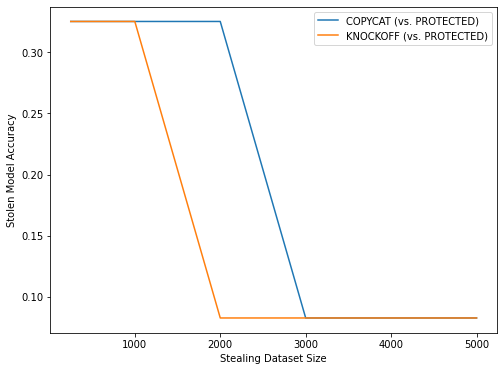

In [152]:
df = pd.DataFrame(cleaned_protected_results, columns=['Method Name', 'Stealing Dataset Size', "Accuracy"])

fig, ax = plt.subplots(figsize=(8,6))

ax.set_xlabel("Stealing Dataset Size")
ax.set_ylabel("Stolen Model Accuracy")

for name, group in df.groupby("Method Name"):
    group.plot(1, 2, ax=ax, label=name)

plt.show()

#### DISCUSIÓN

### ATAQUE DE EVASIÓN